# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
# from api_keys import weather_api_key

from myconfig import wmap_api_key

In [16]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities_output.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [17]:
# query = f"api.openweathermap.org/data/2.5/weather?q={city name}&appid={your api key}"
base_url = f"http://api.openweathermap.org/data/2.5/weather?units=imperial&appid={wmap_api_key}&q="

## Generate Cities List

In [18]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

636


In [21]:
# print all the cities
print(cities)

636
['vaini', 'abu dhabi', 'kinablangan', 'clyde river', 'chara', 'mataura', 'barrow', 'pueblo', 'albany', 'vilyuysk', 'busselton', 'hailar', 'umzimvubu', 'hauterive', 'georgetown', 'daru', 'nishihara', 'jamestown', 'illoqqortoormiut', 'victoria', 'nuuk', 'nikolskoye', 'samalaeulu', 'san cristobal', 'nanortalik', 'tuktoyaktuk', 'odesskoye', 'hilo', 'torbay', 'evensk', 'ushuaia', 'necochea', 'sulangan', 'vaitupu', 'taolanaro', 'hobart', 'saint-philippe', 'rongcheng', 'khorramshahr', 'lebu', 'port elizabeth', 'pacov', 'sitka', 'tiznit', 'tasiilaq', 'salas', 'narsaq', 'butaritari', 'geraldton', 'partenit', 'colares', 'port alfred', 'atuona', 'tucurui', 'cape town', 'chumikan', 'marawi', 'kruisfontein', 'ayan', 'sentyabrskiy', 'abu samrah', 'tripoli', 'mantua', 'tuatapere', 'kaitangata', 'coahuayana', 'goderich', 'betioky', 'barentsburg', 'nizhneyansk', 'neftcala', 'egvekinot', 'hirara', 'lichinga', 'comodoro rivadavia', 'lavrentiya', 'ous', 'shadegan', 'saleaula', 'new norfolk', 'kiruna',

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [22]:
# API Call Method 1   -   Split the cities list into sublists/batches of maximum 50 items and iterate through the sublists 
no_of_cities = len(cities)             # Get totl number of cities
set_of_cities = []                     # An empty list for the sublists
setcount = no_of_cities//50            # Get the number of sublists with 50 items
i=0
# Create a list with the city sublists
for idx in range(1,setcount+1):        
    set_of_cities.append(cities[i:i+50])
    i = i+50
# Add the remaining cities as the final sublist
if i < no_of_cities:
    set_of_cities.append(cities[i:no_of_cities])
    
# Initialize empty lists to store each of the components
city_name = []
country=[] 
date = []
city_lat = []
city_lon = []
cloudy = []
humidity = []
max_temp = []
min_temp = []
windsp = []

# Indicate the beginning of data retrrieval with a message
print("        Beginning Data Retrieval")
print("-----------------------------------------")

# Loop through all the city sublists
for idx in range(0,len(set_of_cities)):
    counter = 1                              # Initialize the counter for each sublist/batch of cities
    
    # Iterate through all the cities in each sublist
    for city in set_of_cities[idx]:
        query_url = f"{base_url}{city}"                                    # Get the url for the current city.
        print(f"Processing record {counter} of set {idx+1} | {city}")      # Display which city from which sublist is in process.
        get_response = requests.get(query_url)                             # Fetch the data using the API call.
        
        if(get_response.status_code==404):                                 # Check if the city url has valid data.
            print("City not found.......skipping......")                   # Display message if the url doenot exist.
            pass        
        else:                                                              # Proceed with reading data if the url is valid.
            response = get_response.json()                                 # Retrieve the city data in json format.
            try:
                # Read and store all the relavant data into the previously opened lists.
                date.append(response['dt'])
                country.append(response['sys']['country'])
                city_lat.append(response['coord']['lat'])
                city_lon.append(response['coord']['lon'])
                cloudy.append(response['clouds']['all'])
                humidity.append(response['main']['humidity'])
                max_temp.append(response['main']['temp_max'])
                min_temp.append(response['main']['temp_min'])
                windsp.append(response['wind']['speed'])
                city_name.append(city)
            except KeyError:
                print("Key not found...")
                pass
            except Exception as e:
                print(f"Error.... {e}")
                pass
        counter = counter + 1                           # Increment the counter to indicate the next city from the sublist
    time.sleep(1)                                       # Sleep for a second after each sublist is processed
print("-----------------------------------------")
print("        Data Retrieval Complete")
print("-----------------------------------------")

        Beginning Data Retrieval
-----------------------------------------
Processing record 1 of set 1 | vaini
Processing record 2 of set 1 | abu dhabi
Processing record 3 of set 1 | kinablangan
Processing record 4 of set 1 | clyde river
Processing record 5 of set 1 | chara
Processing record 6 of set 1 | mataura
Processing record 7 of set 1 | barrow
Processing record 8 of set 1 | pueblo
Processing record 9 of set 1 | albany
Processing record 10 of set 1 | vilyuysk
Processing record 11 of set 1 | busselton
Processing record 12 of set 1 | hailar
Processing record 13 of set 1 | umzimvubu
City not found.......skipping......
Processing record 14 of set 1 | hauterive
Processing record 15 of set 1 | georgetown
Processing record 16 of set 1 | daru
Processing record 17 of set 1 | nishihara
Processing record 18 of set 1 | jamestown
Processing record 19 of set 1 | illoqqortoormiut
City not found.......skipping......
Processing record 20 of set 1 | victoria
Processing record 21 of set 1 | nuuk
Pr

City not found.......skipping......
Processing record 41 of set 4 | ostrovnoy
Processing record 42 of set 4 | osakarovka
Processing record 43 of set 4 | port-cartier
Processing record 44 of set 4 | samarinda
Processing record 45 of set 4 | kirando
Processing record 46 of set 4 | kodiak
Processing record 47 of set 4 | airai
Processing record 48 of set 4 | bayanday
Processing record 49 of set 4 | fernie
Processing record 50 of set 4 | san patricio
Processing record 1 of set 5 | faanui
Processing record 2 of set 5 | juneau
Processing record 3 of set 5 | paamiut
Processing record 4 of set 5 | khed brahma
Processing record 5 of set 5 | ulladulla
Processing record 6 of set 5 | bobonong
City not found.......skipping......
Processing record 7 of set 5 | te anau
Processing record 8 of set 5 | la ronge
Processing record 9 of set 5 | college
Processing record 10 of set 5 | meyungs
City not found.......skipping......
Processing record 11 of set 5 | muravlenko
Processing record 12 of set 5 | skegne

Processing record 29 of set 8 | naryan-mar
Processing record 30 of set 8 | tual
Processing record 31 of set 8 | poya
Processing record 32 of set 8 | saint-francois
Processing record 33 of set 8 | amderma
City not found.......skipping......
Processing record 34 of set 8 | neuquen
Processing record 35 of set 8 | banjar
Processing record 36 of set 8 | lata
Processing record 37 of set 8 | korla
Processing record 38 of set 8 | lagoa
Processing record 39 of set 8 | umm bab
Processing record 40 of set 8 | general roca
Processing record 41 of set 8 | nautla
Processing record 42 of set 8 | krasnogvardeyskiy
Processing record 43 of set 8 | louth
Processing record 44 of set 8 | pisco
Processing record 45 of set 8 | nam tha
City not found.......skipping......
Processing record 46 of set 8 | yanchukan
City not found.......skipping......
Processing record 47 of set 8 | port hawkesbury
Processing record 48 of set 8 | pakokku
Processing record 49 of set 8 | karkaralinsk
City not found.......skipping..

Processing record 16 of set 12 | zambezi
Processing record 17 of set 12 | porbandar
Processing record 18 of set 12 | guatire
Processing record 19 of set 12 | nisia floresta
Processing record 20 of set 12 | ostersund
Processing record 21 of set 12 | humaita
Processing record 22 of set 12 | akureyri
Processing record 23 of set 12 | oda
Processing record 24 of set 12 | tilichiki
Processing record 25 of set 12 | tecoanapa
Processing record 26 of set 12 | vagay
Processing record 27 of set 12 | thinadhoo
Processing record 28 of set 12 | tongling
Processing record 29 of set 12 | anaconda
Processing record 30 of set 12 | soe
Processing record 31 of set 12 | beloha
Processing record 32 of set 12 | hildburghausen
Processing record 33 of set 12 | ziarat
Processing record 34 of set 12 | mackay
Processing record 35 of set 12 | avera
Processing record 36 of set 12 | loja
Processing record 37 of set 12 | nizhniy kuranakh
Processing record 38 of set 12 | chiredzi
Processing record 39 of set 12 | escar

In [ ]:
# # API Call Method 2   -  Loop through the whole list of cities, sleep for 1 second after every 50 entries are processed
# # Initialize empty lists to store each of the components
# city_name = []
# country=[] 
# date = []
# city_lat = []
# city_lon = []
# cloudy = []
# humidity = []
# max_temp = []
# min_temp = []
# windsp = []

# set_no = 1               # Initialize a counter for each batch of cities
# counter = 1              # Initialize a counter for each city per batch of cities
# # Indicate the beginning of data retrrieval with a message
# print("        Beginning Data Retrieval")
# print("-----------------------------------------")
# for city in cities:    
#     query_url = f"{base_url}{city}"                                    # Get the url for the current city.
#     print(f"Processing record {counter} of set {set_no} | {city} ")    # Display which city from which batch is in process.
#     get_response = requests.get(query_url)                             # Fetch the data using the API call.
#     if(get_response.status_code==404):                                 # Check if the city url has valid data.
#         print("City not found.......skipping......")                   # Display message if the url doenot exist.
#         pass                                                           # Skip the following steps for the city not found
#     else:                                                              # Proceed with reading data if the url is valid.
#         response = get_response.json()                                 # Retrieve the city data in json format.
#         try:
#             # Read and store all the relavant data into the previously opened lists.
#             date.append(response['dt'])
#             country.append(response['sys']['country'])
#             city_lat.append(response['coord']['lat'])
#             city_lon.append(response['coord']['lon'])
#             cloudy.append(response['clouds']['all'])
#             humidity.append(response['main']['humidity'])
#             max_temp.append(response['main']['temp_max'])
#             min_temp.append(response['main']['temp_min'])
#             windsp.append(response['wind']['speed'])
#             city_name.append(city)
#         except KeyError:
#             print("Key not found...")
#             pass
#         except Exception as e:
#             print(f"Error.... {e}")
#             pass
#     if counter < 50:
#         counter = counter + 1          # Increment the counter to indicate the next city from the current btach
#     else:
#         counter = 1                    # Initialize the counter to 1 for the first city from the next batch
#         set_no = set_no + 1            # Increment the batch counter
#         time.sleep(1)                  # Pause for a second before starting the next batch
# # Display a message to indicate the end of data retrieval.
# print("-----------------------------------------")
# print("        Data Retrieval Complete")
# print("-----------------------------------------")        

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
# Convert all the data retrieved into a dataframe
city_weather_data = pd.DataFrame({
    "City Name" : city_name,
    "Country" : country,
    "Cloudiness" : cloudy,
    "Humidity" : humidity,
    "Latitude" : city_lat,
    "Longitude" : city_lon,
    "Max Temp" : max_temp,
    "Wind Speed" : windsp,
    "Date" : date
})
city_weather_data.insert(0, 'City ID', pd.RangeIndex(stop=city_weather_data.shape[0]))
city_weather_data.set_index("City ID", drop=True, inplace=True)
# Display the dataframe.
city_weather_data

,City Name,Country,Cloudiness,Humidity,Latitude,Longitude,Max Temp,Wind Speed,Date
City ID,,,,,,,,,
0,vaini,TO,90,100,-21.20,-175.20,66.20,4.70,1595197833
1,abu dhabi,AE,41,53,24.47,54.37,96.80,6.93,1595197550
2,kinablangan,PH,99,78,7.69,126.55,80.49,3.06,1595197834
3,clyde river,CA,90,75,70.47,-68.59,46.40,9.17,1595197323
4,chara,RU,100,86,56.91,118.26,55.06,0.94,1595197365
...,...,...,...,...,...,...,...,...,...
586,impfondo,CG,100,91,1.64,18.07,71.35,1.32,1595197887
587,irtyshskiy,RU,37,87,58.33,68.13,63.95,8.48,1595197887
588,minas novas,BR,96,79,-17.22,-42.59,62.46,4.14,1595197887


In [24]:
city_weather_data.count()

City Name     591
Country       591
Cloudiness    591
Humidity      591
Latitude      591
Longitude     591
Max Temp      591
Wind Speed    591
Date          591
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [25]:
if city_weather_data["Humidity"].max() > 100:
    # Get the indices of cities that have humidity over 100% and drop those rows.
    city_weather_data.drop(city_weather_data[city_weather_data['Humidity'] > 100].index, inplace = True)
    print("\nRemoved cities with humidity > 100% and updated the dataframe")

## Saving the Data to a csv file

In [26]:
# Export the City Weather Data into a csv
city_weather_data.to_csv(output_data_file)

# print("Data saved into a csv file")
city_weather_data

,City Name,Country,Cloudiness,Humidity,Latitude,Longitude,Max Temp,Wind Speed,Date
City ID,,,,,,,,,
0,vaini,TO,90,100,-21.20,-175.20,66.20,4.70,1595197833
1,abu dhabi,AE,41,53,24.47,54.37,96.80,6.93,1595197550
2,kinablangan,PH,99,78,7.69,126.55,80.49,3.06,1595197834
3,clyde river,CA,90,75,70.47,-68.59,46.40,9.17,1595197323
4,chara,RU,100,86,56.91,118.26,55.06,0.94,1595197365
...,...,...,...,...,...,...,...,...,...
586,impfondo,CG,100,91,1.64,18.07,71.35,1.32,1595197887
587,irtyshskiy,RU,37,87,58.33,68.13,63.95,8.48,1595197887
588,minas novas,BR,96,79,-17.22,-42.59,62.46,4.14,1595197887


##### Statistial Summary

In [27]:
city_weather_data.describe()

,Cloudiness,Humidity,Latitude,Longitude,Max Temp,Wind Speed,Date
count,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,5.910000e+02
mean,48.830795,73.118443,21.349205,22.553756,69.272284,7.689289,1.595198e+09
std,37.984276,19.543420,32.611532,90.211994,13.914895,5.244952,2.401802e+02
min,0.000000,7.000000,-54.800000,-179.170000,28.400000,0.090000,1.595197e+09
25%,6.000000,64.000000,-3.785000,-57.790000,58.800000,3.670000,1.595198e+09
50%,44.000000,77.000000,25.520000,29.540000,71.010000,6.930000,1.595198e+09
75%,88.000000,87.000000,49.130000,102.500000,78.800000,10.290000,1.595198e+09
max,100.000000,100.000000,78.220000,179.320000,107.010000,28.860000,1.595198e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Scatter plots

In [29]:
# Function to create scatter plots
from datetime import date
today = date.today().strftime('%m/%d/%y')
def scatterplot (ydata, ylabel, unit, filename):
    x_axis = city_weather_data["Latitude"]
    y_axis = city_weather_data[f"{ydata}"]
    plt.xlabel("Latitude")
    plt.ylabel(f"{ylabel} ({unit})")
    plt.title(f"City Latitude vs {ylabel} ({today})")
    plt.grid(True)
    plt.scatter(x_axis, y_axis, marker='o', edgecolor='black')
    plt.savefig(f"../output_data/{filename}.png")
    plt.plot()

## Latitude vs. Temperature Plot

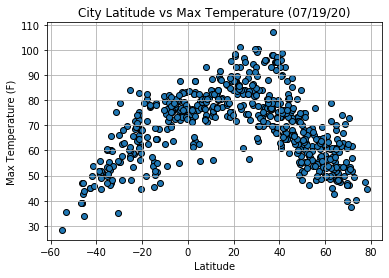

In [30]:
scatterplot("Max Temp", "Max Temperature", "F", "lat_temp", )

## Latitude vs. Humidity Plot

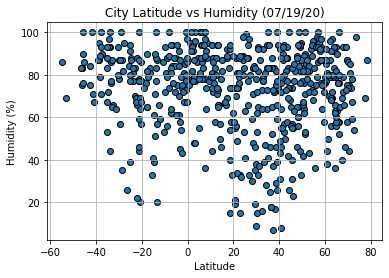

In [31]:
scatterplot("Humidity", "Humidity", "%", "lat_humid")

## Latitude vs. Cloudiness Plot

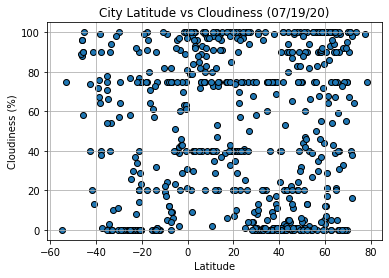

In [32]:
scatterplot("Cloudiness", "Cloudiness", "%", "lat_cloud")

## Latitude vs. Wind Speed Plot

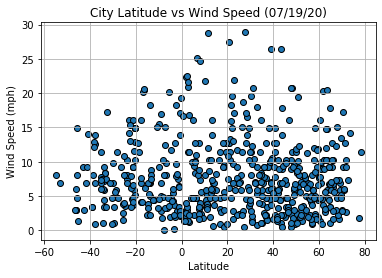

In [33]:
scatterplot("Wind Speed", "Wind Speed", "mph", "lat_wind")

## Linear Regression

In [42]:
# OPTIONAL: Create a function to create Linear Regression plots
def linregression (x_values, y_values, y_label, title, xpos, ypos, filename):
    from datetime import date
    today = date.today().strftime('%m/%d/%y')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    print(f"The r-squared is {rvalue**2}")
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.title(f"{title} ({today})")
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-", alpha=0.75)
    plt.annotate(line_eq,(xpos,ypos),fontsize=15, color="red", alpha=0.75)
    plt.savefig(f"../output_data/{filename}.png")
    plt.show()

In [43]:
# Create Northern and Southern Hemisphere DataFrames
southern_df = city_weather_data.loc[city_weather_data['Latitude'] < 0]
northern_df = city_weather_data.loc[city_weather_data['Latitude'] >= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.43503747842520024


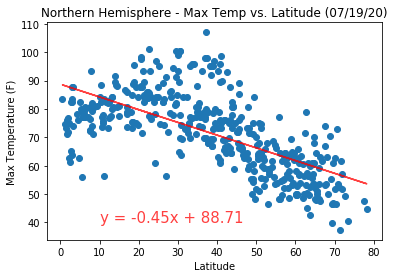

In [44]:
x_axis = northern_df["Latitude"]
y_axis = northern_df["Max Temp"]
ylabel = "Max Temperature (F)"
title = "Northern Hemisphere - Max Temp vs. Latitude"
linregression(x_axis, y_axis, ylabel, title, 10,40, 'north_temp')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.5868266444097787


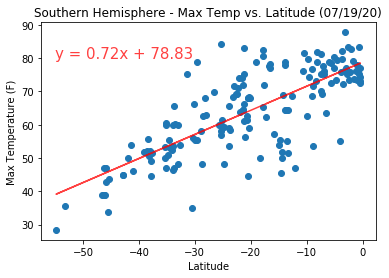

In [45]:
x_axis = southern_df["Latitude"]
y_axis = southern_df["Max Temp"]
ylabel = "Max Temperature (F)"
title = "Southern Hemisphere - Max Temp vs. Latitude"
linregression(x_axis, y_axis, ylabel, title, -55, 80, 'south_temp')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.00015708410351203075


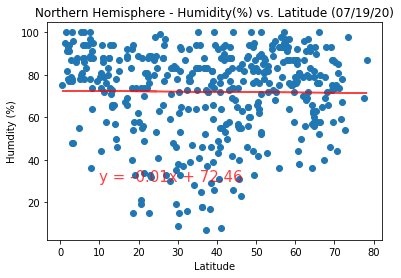

In [46]:
x_axis = northern_df["Latitude"]
y_axis = northern_df["Humidity"]
ylabel = "Humdity (%)"
title = "Northern Hemisphere - Humidity(%) vs. Latitude"
linregression(x_axis, y_axis, ylabel, title, 10, 30, 'north_humid')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.0167606156081585


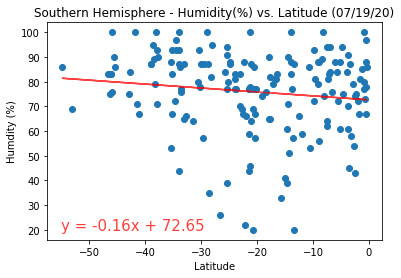

In [47]:
x_axis = southern_df["Latitude"]
y_axis = southern_df["Humidity"]
ylabel = "Humdity (%)"
title = "Southern Hemisphere - Humidity(%) vs. Latitude"
linregression(x_axis, y_axis, ylabel, title, -55, 20, 'south_humid')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.00596489671653467


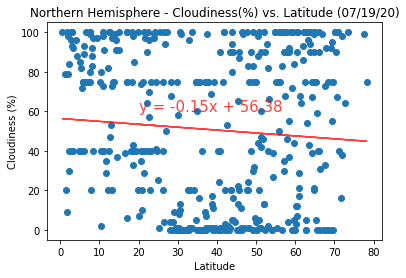

In [48]:
x_axis = northern_df["Latitude"]
y_axis = northern_df["Cloudiness"]
ylabel = "Cloudiness (%)"
title = "Northern Hemisphere - Cloudiness(%) vs. Latitude"
linregression(x_axis, y_axis, ylabel, title, 20, 60, 'north_cloud')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 1.4692028943684402e-05


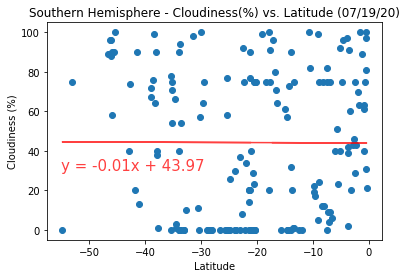

In [53]:
x_axis = southern_df["Latitude"]
y_axis = southern_df["Cloudiness"]
ylabel = "Cloudiness (%)"
title = "Southern Hemisphere - Cloudiness(%) vs. Latitude"
linregression(x_axis, y_axis, ylabel, title, -55, 30, 'south_cloud')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.01203878529316499


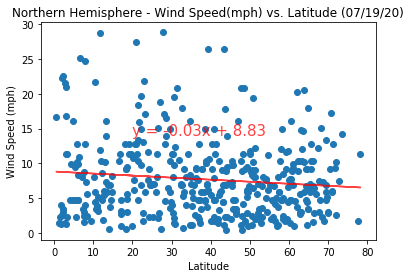

In [55]:
x_axis = northern_df["Latitude"]
y_axis = northern_df["Wind Speed"]
ylabel = "Wind Speed (mph)"
title = "Northern Hemisphere - Wind Speed(mph) vs. Latitude"
linregression(x_axis, y_axis, ylabel, title, 20, 14, 'north_wind')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.0011763038742113425


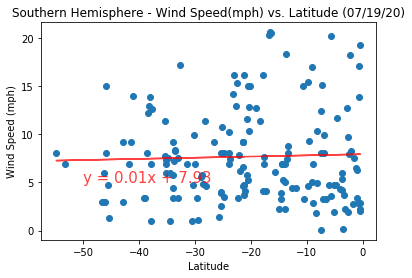

In [56]:
x_axis = southern_df["Latitude"]
y_axis = southern_df["Wind Speed"]
ylabel = "Wind Speed (mph)"
title = "Southern Hemisphere - Wind Speed(mph) vs. Latitude"
linregression(x_axis, y_axis, ylabel, title, -50, 5, 'south_wind')

####  What is the weather like as we approach the equator? - Analysis

The scatter plot shows that temperature is more consistant near 0 degree latitude, which is the equator.
But it drops considerably as it moves to latitudes less than zero and greater than zero.
The maximun temperature near the equator ranges from 60 to 90 degrees Fahrenheit.

In southern hemisphere, the temperature has a strong positive correlation with latitude.
It increases .78 times in the southern hemisphere as we move from south pole towards the equator.

In the northern hemisphere, the temperatre is negatively correlated with latitude.
It decreases .45 times in northern hemisphere as we move away from the equator towards the north pole.

The regression line is nearly a horizontal line in latitude vs humdidty, latitude vs cloudiness and latitude vs wind.
Also the r squared value is near to zero.
The dependency of humidity, cloudiness and wind speed on the latitude is negligible.

The statistical summary indicates that the humidity is higher when the temperature is higher.